# Is gold a good inflation hedge to preserve purchasing power?

### Gold is traditionally used to fight inflation as it tends to hold its value and preserve purchasing power. However, gold when compared to other investment instruments, do not generally provide rate of returns and may additionally incur costs when storing physical gold. Therefore, the inflationary hedge is purely a function of gold price.

For any investments, there are always related costs whether in regards to the buying, selling or holding etc. To simplify this assignment, we assume hedging our inflation risks by investing into gold-related financial instruments backed by investment grade physical gold and also assume transaction related costs such as commission and rolling costs such as custodian fees are FREE!!!

Data used for gold are LBMA spot prices downloaded from [World Gold Council](https://www.gold.org/) and US CPI figures from [Organisation for Economic
Co-operation and Development - OECD](https://stats.oecd.org)

In [1]:
#Let's import the data and examine it
import pandas as pd
gold_price = pd.read_excel('PricesMonthly.xlsx', sheet_name='Monthly_Full')
gold_price.head()

,Name,US dollar,Euro,Pound sterling,Japanese yen
0,1969-12-31,35.20,22.24,14.66,12592.44
1,1970-01-30,34.99,23.20,14.54,12496.35
2,1970-02-27,35.02,23.26,14.55,12529.95
3,1970-03-31,35.30,23.42,14.67,12627.65
4,1970-04-30,35.85,23.79,14.93,12858.36


In [2]:
#dataframe data is already nicely formatted and without null values
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            640 non-null    datetime64[ns]
 1   US dollar       640 non-null    float64       
 2   Euro            640 non-null    float64       
 3   Pound sterling  640 non-null    float64       
 4   Japanese yen    640 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 25.1 KB


In [3]:
print("Gold prices are recorded on a monthly basis from", 
      min(gold_price['Name']).strftime('%B/%d/%Y'), "to",
      max(gold_price['Name']).strftime('%B/%d/%Y'))
gold_price.describe()

Gold prices are recorded on a monthly basis from December/31/1969 to March/31/2023


,US dollar,Euro,Pound sterling,Japanese yen
count,640.000000,640.000000,640.000000,640.000000
mean,629.801250,521.961516,413.686813,78748.816141
std,521.996679,441.893747,390.386621,52268.511481
min,34.990000,22.240000,14.540000,12496.350000
25%,296.412500,273.002500,185.047500,40004.825000
50%,388.625000,334.710000,240.735000,57483.970000
75%,1060.475000,762.460000,673.147500,116230.100000
max,1979.700000,1822.170000,1601.120000,263478.270000


In [4]:
#no duplicated rows found
gold_price[gold_price.duplicated(keep=False)]

,Name,US dollar,Euro,Pound sterling,Japanese yen


Some preprocessing on the data to get started. For easier comparison to CPI, we do the following:<br>
(i) Use December 1969 as base year<br>
(ii) Percent difference in annual gold price relative to preceeding year<br>
(iii) Do the same for the various currencies to view any <strong>Purchasing Power Parity</strong> (PPP)

In [5]:
gold_price["year"]=gold_price['Name'].dt.year
gold_price["month"]=gold_price['Name'].dt.month

gold_price = gold_price[gold_price['month']==12]
gold_price['USD'] = gold_price['US dollar']/gold_price['US dollar'].shift(1)*100-100
gold_price['EUR'] = gold_price['Euro']/gold_price['Euro'].shift(1)*100-100
gold_price['GBP'] = gold_price['Pound sterling']/gold_price['Pound sterling'].shift(1)*100-100
gold_price['JPY'] = gold_price['Japanese yen']/gold_price['Japanese yen'].shift(1)*100-100

gold_price_annual_index=gold_price[['year','USD', 'EUR', 'GBP', 'JPY']].reset_index(drop=True)
gold_price_annual_index.fillna(value=0, inplace=True)
gold_price_annual_index.head(10)

,year,USD,EUR,GBP,JPY
0,1969,0.000000,0.000000,0.000000,0.000000
1,1970,6.193182,9.757194,5.457026,5.134748
2,1971,16.506153,10.856206,10.349288,3.417546
3,1972,49.024110,46.156689,62.133646,42.922460
4,1973,72.958398,66.750948,74.692697,60.385626
5,1974,66.146993,61.000758,64.238411,78.525250
6,1975,-24.798928,-20.248634,-12.651210,-23.632325
7,1976,-4.099822,6.530468,14.021927,-7.824677
8,1977,22.639405,22.026383,8.868927,0.247970
9,1978,37.011216,24.509448,28.646136,11.016311


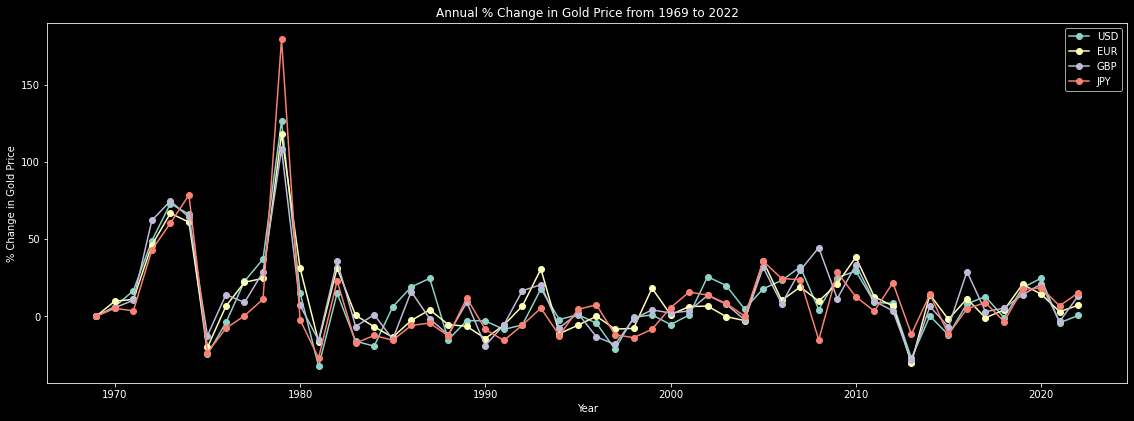

In [6]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig1 = plt.figure(figsize=(15, 5)) #, dpi=200, facecolor=(1, 1, 1)
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(gold_price_annual_index['year'], gold_price_annual_index['USD'], ls='-', label="USD", marker='o')
ax1.plot(gold_price_annual_index['year'], gold_price_annual_index['EUR'], ls='-', label="EUR", marker='o')
ax1.plot(gold_price_annual_index['year'], gold_price_annual_index['GBP'], ls='-', label="GBP", marker='o')
ax1.plot(gold_price_annual_index['year'], gold_price_annual_index['JPY'], ls='-', label="JPY", marker='o')

ax1.legend(loc=1)
ax1.set_xlabel('Year')
ax1.set_ylabel('% Change in Gold Price')
ax1.set_title('Annual % Change in Gold Price from 1969 to 2022')
plt.show()

Some history:<br>
International Monetary Fund, IMF, is created to rebuild the global monetary system after the Second World War. Gold was used as a foundation for the first international monetary system agreement and this agreeement 'fixed' the price of gold as previously established by President Roosevelt since 1933. It was the good old days when currencies are still backed by gold.
>It was the ‘glue’ that held the system of exchange rates together.

Notice that the gold price expressed by the various major currencies tend to 'stick' to one other irregardless of the fluctuations in the early years of the data up till the 1970s.

Some more history (to understand the trendlines): <br>
Alas! Good times do not last!<br>
Due to various reasons, the agreement ended November 1973 and the price of gold was allowed free float.
This is mainly due to the suspension of dollar convertibility into gold—the end of the IMF gold standard—in August 1971. In August 1971, President Nixon also terminated the US dollar's peg to gold
official price of US$35 an ounce. (Notice the prices of gold in the first column when the data is imported)

For these reasons, we restrict the data to start from 1980 so that we may better see the PPP. Instead of using the Macdonalds 'Big Mac' as espoused by the Economist, which taste good admittedly &#x1F60B;, we try to visualise it from the perspective of gold instead which does not rot over time &#x1F605;.

In [7]:
#get index value
k = gold_price_annual_index[gold_price_annual_index['year']==1980].index.values.astype(int)[0]
gold_price_annual_index[gold_price_annual_index['year']==1980]

,year,USD,EUR,GBP,JPY
11,1980,15.185547,31.188152,6.946191,-2.345624


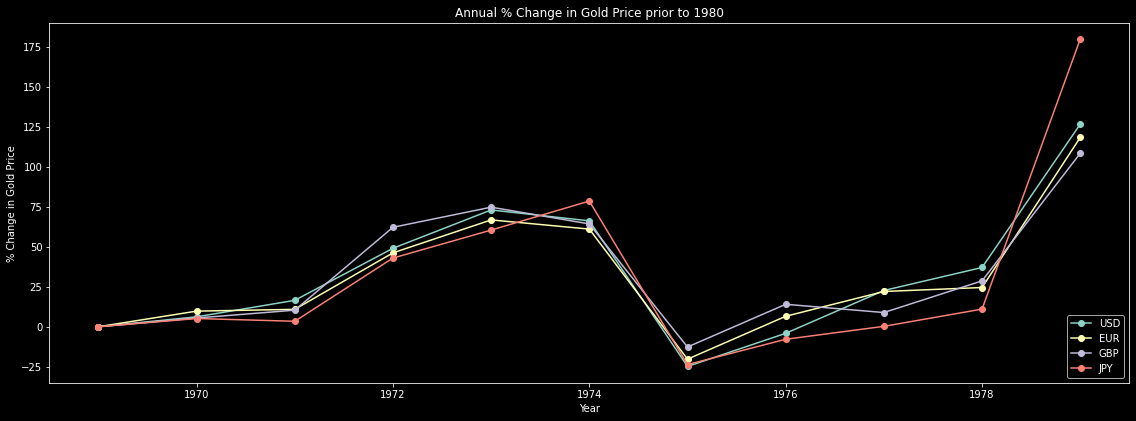

Note the 'stickiness' of currencies prior to 1980


In [8]:
fig2 = plt.figure(figsize=(15, 5)) #, dpi=200, facecolor=(1, 1, 1)
ax2 = fig2.add_axes([0,0,1,1])
ax2.plot(gold_price_annual_index['year'][:k], gold_price_annual_index['USD'][:k], ls='-', label="USD", marker='o')
ax2.plot(gold_price_annual_index['year'][:k], gold_price_annual_index['EUR'][:k], ls='-', label="EUR", marker='o')
ax2.plot(gold_price_annual_index['year'][:k], gold_price_annual_index['GBP'][:k], ls='-', label="GBP", marker='o')
ax2.plot(gold_price_annual_index['year'][:k], gold_price_annual_index['JPY'][:k], ls='-', label="JPY", marker='o')

ax2.legend(loc=4)
ax2.set_xlabel('Year')
ax2.set_ylabel('% Change in Gold Price')
ax2.set_title('Annual % Change in Gold Price prior to 1980')
plt.show()
print("Note the 'stickiness' of currencies prior to 1980")

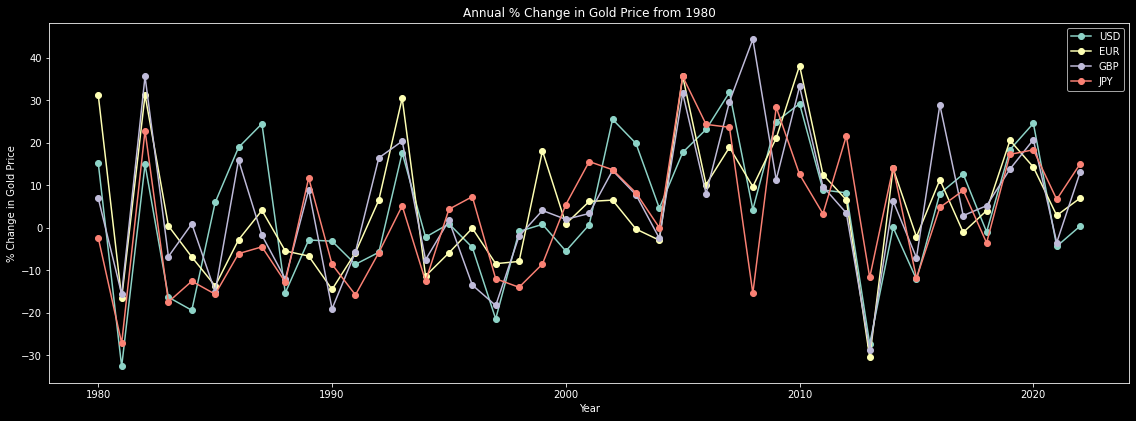

In [9]:
fig3 = plt.figure(figsize=(15, 5)) #, dpi=200, facecolor=(1, 1, 1)
ax3 = fig3.add_axes([0,0,1,1])
ax3.plot(gold_price_annual_index['year'][k:], gold_price_annual_index['USD'][k:], ls='-', label="USD", marker='o')
ax3.plot(gold_price_annual_index['year'][k:], gold_price_annual_index['EUR'][k:], ls='-', label="EUR", marker='o')
ax3.plot(gold_price_annual_index['year'][k:], gold_price_annual_index['GBP'][k:], ls='-', label="GBP", marker='o')
ax3.plot(gold_price_annual_index['year'][k:], gold_price_annual_index['JPY'][k:], ls='-', label="JPY", marker='o')

ax3.legend(loc=1)
ax3.set_xlabel('Year')
ax3.set_ylabel('% Change in Gold Price')
ax3.set_title('Annual % Change in Gold Price from 1980')
plt.show()

The first visualisation has been 'suppressed' due to a huge price movement in 1979.<br>
Also, notice the negative correlation in gold price from JPY and GBP in around 2008?<br>
Note how erratic the currencies are now when the PPP is in full play when subjected to <span style="color:red"><strong>~~full~~</strong></span> market forces! &#x1F914;<br> 
Now we re-plot this graph as cumulative percentage price change instead of annual price change and re-base to 1983 at the same time to avoid the wild fluctuation due to geo-political factors around that time.

In [10]:
base_year = 1983

USD_base = gold_price[gold_price['year']==base_year]['US dollar'].values[0]
EUR_base = gold_price[gold_price['year']==base_year]['Euro'].values[0]
GBP_base = gold_price[gold_price['year']==base_year]['Pound sterling'].values[0]
JPY_base = gold_price[gold_price['year']==base_year]['Japanese yen'].values[0]

gold_price['USD'] = gold_price['US dollar']/USD_base
gold_price['EUR'] = gold_price['Euro']/EUR_base
gold_price['GBP'] = gold_price['Pound sterling']/GBP_base
gold_price['JPY'] = gold_price['Japanese yen']/JPY_base

base_year_index = gold_price_annual_index[gold_price_annual_index['year']==base_year].index.values.astype(int)[0]
gold_price_cumulative_index = gold_price[base_year_index:]
gold_price_cumulative_index = gold_price_cumulative_index[['year','USD', 'EUR', 'GBP', 'JPY']].reset_index(drop=True)
gold_price_cumulative_index.head()

,year,USD,EUR,GBP,JPY
0,1983,1.000000,1.000000,1.000000,1.000000
1,1984,0.806224,0.931597,1.009717,0.874668
2,1985,0.854603,0.804421,0.858151,0.738290
3,1986,1.016606,0.781944,0.995369,0.693639
4,1987,1.265952,0.814259,0.978212,0.662785


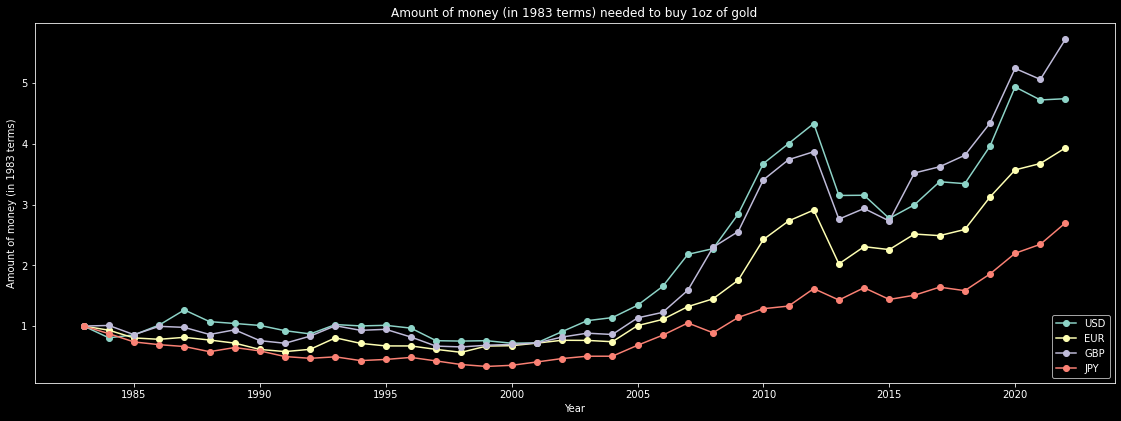

In [11]:
fig4 = plt.figure(figsize=(15, 5)) #, dpi=200, facecolor=(1, 1, 1)
ax4 = fig4.add_axes([0,0,1,1])
ax4.plot(gold_price_cumulative_index['year'], gold_price_cumulative_index['USD'], ls='-', label="USD", marker='o')
ax4.plot(gold_price_cumulative_index['year'], gold_price_cumulative_index['EUR'], ls='-', label="EUR", marker='o')
ax4.plot(gold_price_cumulative_index['year'], gold_price_cumulative_index['GBP'], ls='-', label="GBP", marker='o')
ax4.plot(gold_price_cumulative_index['year'], gold_price_cumulative_index['JPY'], ls='-', label="JPY", marker='o')

ax4.legend(loc=4)
ax4.set_xlabel('Year')
ax4.set_ylabel('Amount of money (in 1983 terms)')
ax4.set_title('Amount of money (in 1983 terms) needed to buy 1oz of gold')
plt.show()

No prize for guessing which fiat money has managed to retain most of its paper value.<br>
Winner - &#x1F4B4; followed by &#x1F4B6;, &#x1F4B5; and &#x1F4B7;

In [12]:
#now to compare the gold price with the US CPI index
cpi = pd.read_csv(r'CPI.csv')
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3570 non-null   object 
 1   Country                3570 non-null   object 
 2   SUBJECT                3570 non-null   object 
 3   Subject                3570 non-null   object 
 4   MEASURE                3570 non-null   object 
 5   Measure                3570 non-null   object 
 6   FREQUENCY              3570 non-null   object 
 7   Frequency              3570 non-null   object 
 8   TIME                   3570 non-null   int64  
 9   Time                   3570 non-null   int64  
 10  Unit Code              3570 non-null   object 
 11  Unit                   3570 non-null   object 
 12  PowerCode Code         3570 non-null   int64  
 13  PowerCode              3570 non-null   object 
 14  Reference Period Code  1298 non-null   object 
 15  Refe

In [13]:
#Get only the relevant information
cpi = cpi[cpi['Measure']=='Percentage change from previous period']
cpi = cpi[cpi['Subject']=='CPI: 01-12 - All items']
CPI = cpi[['Time', 'Value']]
CPI.head()

,Time,Value
448,1965,1.585169
449,1966,3.015075
450,1967,2.772786
451,1968,4.271796
452,1969,5.462386


In [14]:
CPI.describe()

,Time,Value
count,58.000000,58.000000
mean,1993.500000,3.981704
std,16.886879,2.798210
min,1965.000000,-0.355546
25%,1979.250000,2.208544
50%,1993.500000,3.184639
75%,2007.750000,4.794717
max,2022.000000,13.549200


The value in the CPI data refers to the percentage change from last year.<br>
So now we also convert this 'Value' to a cumulative change from the base year of 1983.

In [15]:
CPI = CPI[CPI['Time'] >= base_year].reset_index(drop=True)

CPI['Adj_Value'] = CPI['Value']/100+1
CPI['Index'] = 1.0

for row in range(1,len(CPI)):
    CPI.at[row, 'Index'] = CPI.at[row, 'Adj_Value']*CPI.at[row-1, 'Index']
CPI.head()

,Time,Value,Adj_Value,Index
0,1983,3.212435,1.032124,1.000000
1,1984,4.300536,1.043005,1.043005
2,1985,3.545644,1.035456,1.079987
3,1986,1.898048,1.018980,1.100485
4,1987,3.664563,1.036646,1.140813


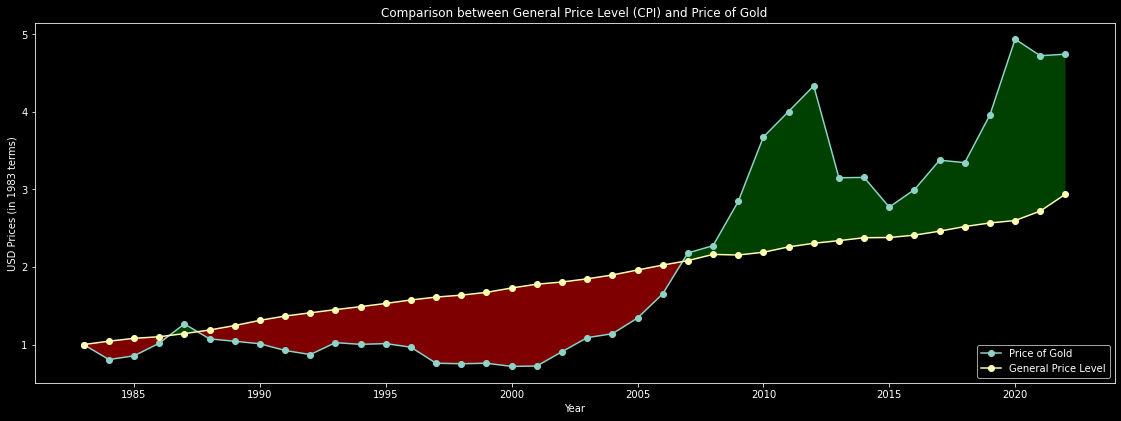

In [16]:
import numpy as np
fig5 = plt.figure(figsize=(15, 5)) #, dpi=200, facecolor=(1, 1, 1)
ax5 = fig5.add_axes([0,0,1,1])
x = np.array(gold_price_cumulative_index['year'])
y1 = np.array(gold_price_cumulative_index['USD'])
y2 = np.array(CPI['Index'])
ax5.plot(x, y1, ls='-', label="Price of Gold", marker='o')
ax5.plot(x, y2, ls='-', label="General Price Level", marker='o')

ax5.legend(loc=4)
positive = ax5.fill_between(x, y1, y2, where=y2<y1, facecolor='green', alpha=0.5, interpolate=True)
negative = ax5.fill_between(x, y1, y2, where=y2>y1, facecolor='red', alpha=0.5, interpolate=True)
ax5.set_xlabel('Year')
ax5.set_ylabel('USD Prices (in 1983 terms)')
ax5.set_title('Comparison between General Price Level (CPI) and Price of Gold')
plt.show()

In [17]:
from shapely.geometry import Polygon
def cal_area(shades):
    paths = shades.get_paths()
    area = 0
    for path in paths:
        polygon = Polygon(path.vertices)
        area += polygon.area
    return area

print("Green shaded area =", round(cal_area(positive), 6))
print("Red shaded area =", round(cal_area(negative), 6))

Green shaded area = 17.134849
Red shaded area = 12.212303


Gold price appreciate lower than inflation in the early years after currencies lost the gold peg. For a number of years, the index even fell below 1 implying that it is even cheaper to buy gold than it was to buy in 1983.<br>
Thus, even if you do not time the market, it would be plain unlucky if one started investing in gold circa 1985 and liquidated the holdings before 2008. However, in view of the huge multi-year trend, gold does appreciate more than the increase in inflation as the overall area shaded in green is still larger than that of the area shaded in red.

Lets add S+P index (from [datahub](https://datahub.io/core/s-and-p-500) ) to the mix!<br>
*S+P index is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States*

In [18]:
sp = pd.read_csv(r'SP Index.csv')
sp.head(1)

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.0,5.21,8.02,NaN


In [19]:
#Date is recognised as string
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1768 non-null   object 
 1   SP500                 1768 non-null   float64
 2   Dividend              1767 non-null   float64
 3   Earnings              1764 non-null   float64
 4   Consumer Price Index  1768 non-null   float64
 5   Long Interest Rate    1768 non-null   float64
 6   Real Price            1768 non-null   float64
 7   Real Dividend         1767 non-null   float64
 8   Real Earnings         1764 non-null   float64
 9   PE10                  1648 non-null   float64
dtypes: float64(9), object(1)
memory usage: 138.2+ KB


In [20]:
sp.describe()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
count,1768.000000,1767.000000,1764.000000,1768.000000,1768.000000,1768.000000,1767.000000,1764.000000,1648.000000
mean,258.374570,5.636486,12.809932,57.726640,4.569559,508.352856,15.159377,29.856173,16.851450
std,514.103382,9.647723,23.854291,70.812597,2.289630,544.306401,8.475205,23.887573,6.735498
min,2.730000,0.180000,0.160000,6.280000,1.500000,67.630000,4.980000,4.190000,4.780000
25%,7.737500,0.410000,0.540000,10.100000,3.290000,170.000000,8.525000,12.647500,11.790000
50%,16.335000,0.830000,1.325000,18.200000,3.860000,253.065000,12.720000,20.445000,16.170000
75%,122.525000,6.370000,13.607500,90.850000,5.222500,610.942500,19.260000,39.320000,20.462500
max,2789.800000,50.000000,109.880000,249.840000,15.320000,2811.960000,50.060000,111.360000,44.200000


Use the closing price in December as the annual price of S+P index.

In [21]:
#appears that the data only have the 1st day of every month
sp['day'] = sp['Date'].str[-2:].astype(int)
sp['month'] = sp['Date'].str[-5:-3].astype(int)
sp['year'] = sp['Date'].str[:4].astype(int)

sp['day'].unique()

array([1])

In [22]:
sp_price = sp[['SP500', 'month', 'year']]
sp_price = sp_price[(sp_price['year'] >= base_year) & (sp_price['month']==12)].reset_index(drop=True)
sp_price.head()

,SP500,month,year
0,164.4,12,1983
1,164.5,12,1984
2,207.3,12,1985
3,248.6,12,1986
4,241.0,12,1987


In [23]:
#rebase to year 1983
sp_price['price'] = sp_price['SP500'] / sp_price[sp_price['year']==base_year].SP500.values.astype(float)[0]
sp_price.head()

,SP500,month,year,price
0,164.4,12,1983,1.000000
1,164.5,12,1984,1.000608
2,207.3,12,1985,1.260949
3,248.6,12,1986,1.512165
4,241.0,12,1987,1.465937


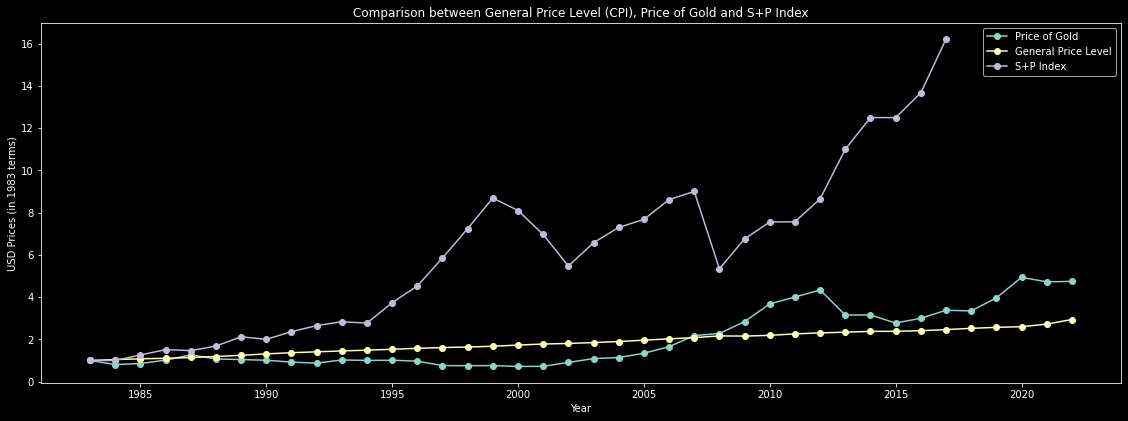

In [24]:
fig6 = plt.figure(figsize=(15, 5)) #, dpi=200, facecolor=(1, 1, 1)
ax6 = fig6.add_axes([0,0,1,1])
x = np.array(gold_price_cumulative_index['year'])
y1 = np.array(gold_price_cumulative_index['USD'])
y2 = np.array(CPI['Index'])
ax6.plot(x, y1, ls='-', label="Price of Gold", marker='o')
ax6.plot(x, y2, ls='-', label="General Price Level", marker='o')
ax6.plot(sp_price['year'], sp_price['price'], ls='-', label="S+P Index", marker='o')

ax6.legend(loc=1)
ax6.set_xlabel('Year')
ax6.set_ylabel('USD Prices (in 1983 terms)')
ax6.set_title('Comparison between General Price Level (CPI), Price of Gold and S+P Index')
plt.show()

In [25]:
sp_price.tail()

,SP500,month,year,price
30,1807.78,12,2013,10.996229
31,2054.27,12,2014,12.495560
32,2054.08,12,2015,12.494404
33,2246.63,12,2016,13.665633
34,2664.34,12,2017,16.206448


WOW! By 2017, S+P has increased to 16 times of its value in 1983!<br>
S+P index is clearly much better than gold and we have yet to take into account the dividends given over the years!

### Conclusion

In the past, cash is still backed by actual precious metals such as silver and gold. Any increase in price translates directly back in the form of physical gold and cash is indeed king! In modern times however, gold does not always keep pace with the inflation as illustrated and there should better investment instruments such as stocks.

*Suggestions for further research:*<br>
If finer data could be obtained at trading figures at the seconds level, by using gold as the in-between, we might be able to chart any potential arbitrage opportuniites between currencies.